1. Qual o número de imóveis por ano de construção?
2. Qual o menor número de quartos por ano de construção dos imóveis?
3. Qual o preço de compra mais alto por cada número de quartos?
4. Qual a soma de todos os preços de compra por cada número de quartos?
5. Qual a soma de todos os preços de compra pelo número de quartos e banheiros?
6. Qual o tamanho médio das salas dos imóveis por ano de construção?
7. Qual o tamanho mediano das salas dos imóveis por ano de construção?
8. Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?
9. Como é o crescimento médio preços de compra dos imóveis, por dia e semana do ano?
10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

In [2]:
import numpy  as np
import pandas as pd
import seaborn as sns


pd.set_option('display.float_format', lambda x: '%.0f' % x) #suprimir a notação científica em Pandas

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/siquette/Analise-de-Dados-com-Python/main/m2/archive/kc_house_data.csv')

1. Qual o número de imóveis por ano de construção?

In [4]:
data["date"] = pd.to_datetime(data["date"])


In [5]:
data.groupby(data['date'].dt.year).size()

date
2014    14633
2015     6980
dtype: int64

2. Qual o menor número de quartos por ano de construção dos imóveis?

In [6]:
data.groupby([data['date'].dt.year, 'bedrooms']).size()

date  bedrooms
2014  0              9
      1            138
      2           1844
      3           6612
      4           4724
      5           1081
      6            176
      7             30
      8             11
      9              3
      10             3
      11             1
      33             1
2015  0              4
      1             61
      2            916
      3           3212
      4           2158
      5            520
      6             96
      7              8
      8              2
      9              3
dtype: int64

3. Qual o preço de compra mais alto por cada número de quartos?

In [7]:
data[['price', 'bedrooms']].groupby('bedrooms').max().reset_index()

,bedrooms,price
0,0,1295650
1,1,1247000
2,2,3278000
3,3,3800000
4,4,4489000
5,5,7062500
6,6,7700000
7,7,3200000
8,8,3300000
9,9,1400000


4. Qual a soma de todos os preços de compra por cada número de quartos?


In [8]:
data[['price', 'bedrooms']]. groupby('bedrooms').sum()

,price
bedrooms,
0,5323550
1,63210934
2,1107788602
3,4580263939
4,4372957028
5,1259346326
6,224541613
7,36145017
8,14366000


5. Qual a soma de todos os preços de compra pelo número de quartos e banheiros?

In [9]:
data['bathrooms'] = data['bathrooms'].astype(int)

In [10]:
data[['price', 'bedrooms', 'bathrooms']]. groupby(['bedrooms','bathrooms']).sum().reset_index()

,bedrooms,bathrooms,price
0,0,0,3907600
1,0,1,516000
2,0,2,899950
3,1,0,7872450
4,1,1,50831584
5,1,2,4506900
6,2,0,8897351
7,2,1,807539672
8,2,2,275503729
9,2,3,15847850


6. Qual o tamanho médio das salas dos imóveis por ano de construção?


In [11]:
data[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732
1901,1764
1902,1920
1903,1508
1904,1603
...,...
2011,2314
2012,2379
2013,2637


7. Qual o tamanho mediano das salas dos imóveis por ano de construção?

In [12]:
data[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540
1901,1610
1902,1600
1903,1505
1904,1280
...,...
2011,2270
2012,2238
2013,2580


8 Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

In [13]:
data[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,733
1901,668
1902,879
1903,470
1904,1077
...,...
2011,805
2012,771
2013,883


9. Como é o crescimento médio preços de compra dos imóveis, por dia e semana do ano?


In [14]:
from matplotlib import pyplot as plt

<BarContainer object of 2 artists>

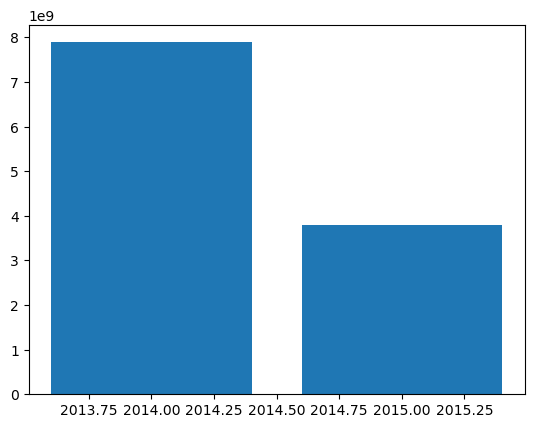

In [15]:
#eixo x: anos
#eixo y: soma dos precos


data['year']= pd.to_datetime(data['date']).dt.year

by_year = data[['price', 'year']].groupby('year').sum().reset_index()

plt.bar( by_year['year'], by_year['price'])





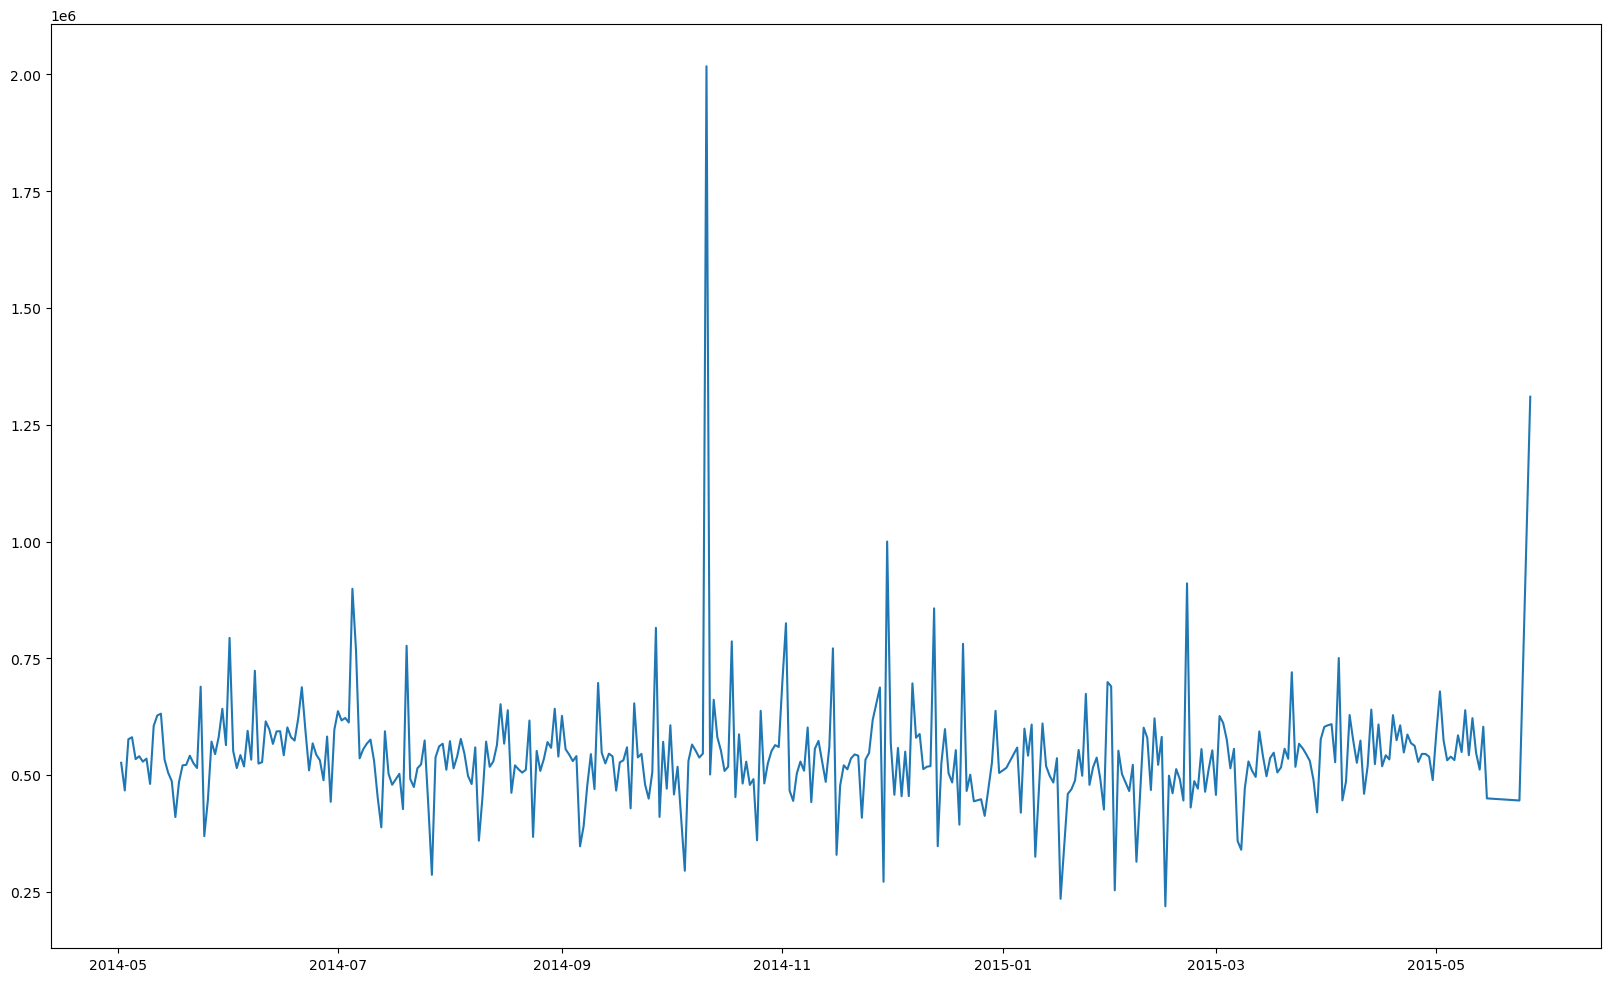

In [16]:
data['day']= pd.to_datetime(data['date'])

by_day = data[['price', 'day']].groupby('day').mean().reset_index()

plt.figure( figsize=(20,12))
plt.plot( by_day['day'], by_day['price'])



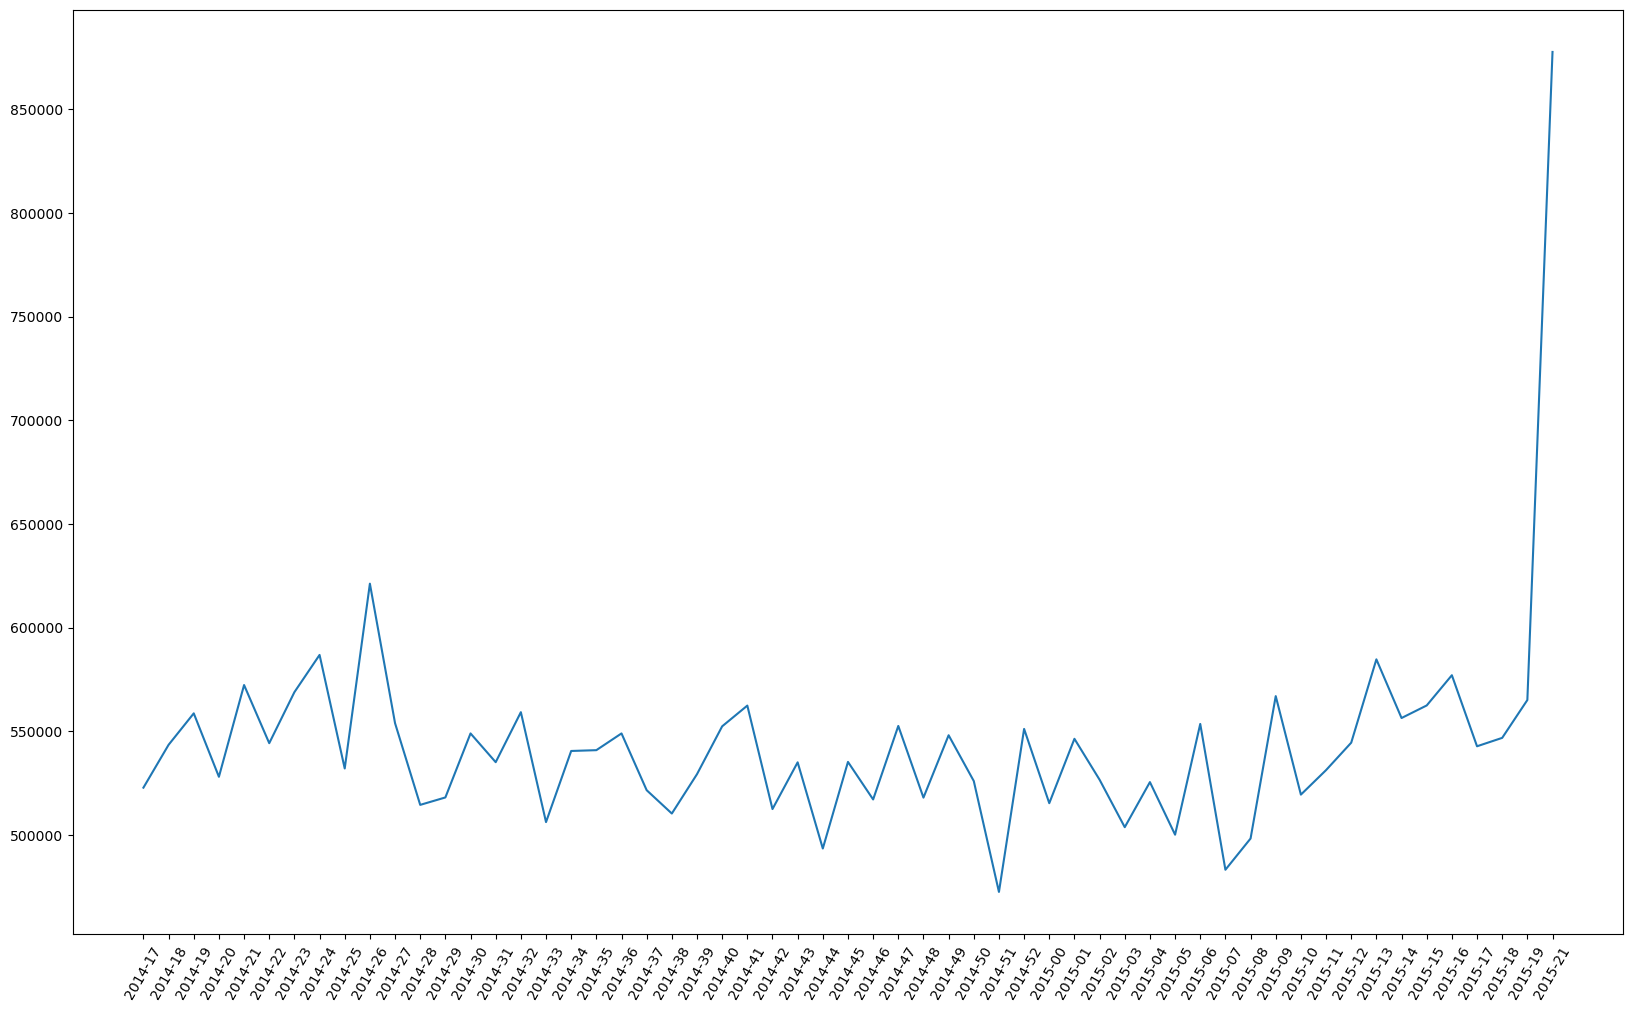

In [17]:
data['year_week']= pd.to_datetime(data['date']).dt.strftime('%Y-%U')

by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()

plt.figure( figsize=(20,12))
plt.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation=60);

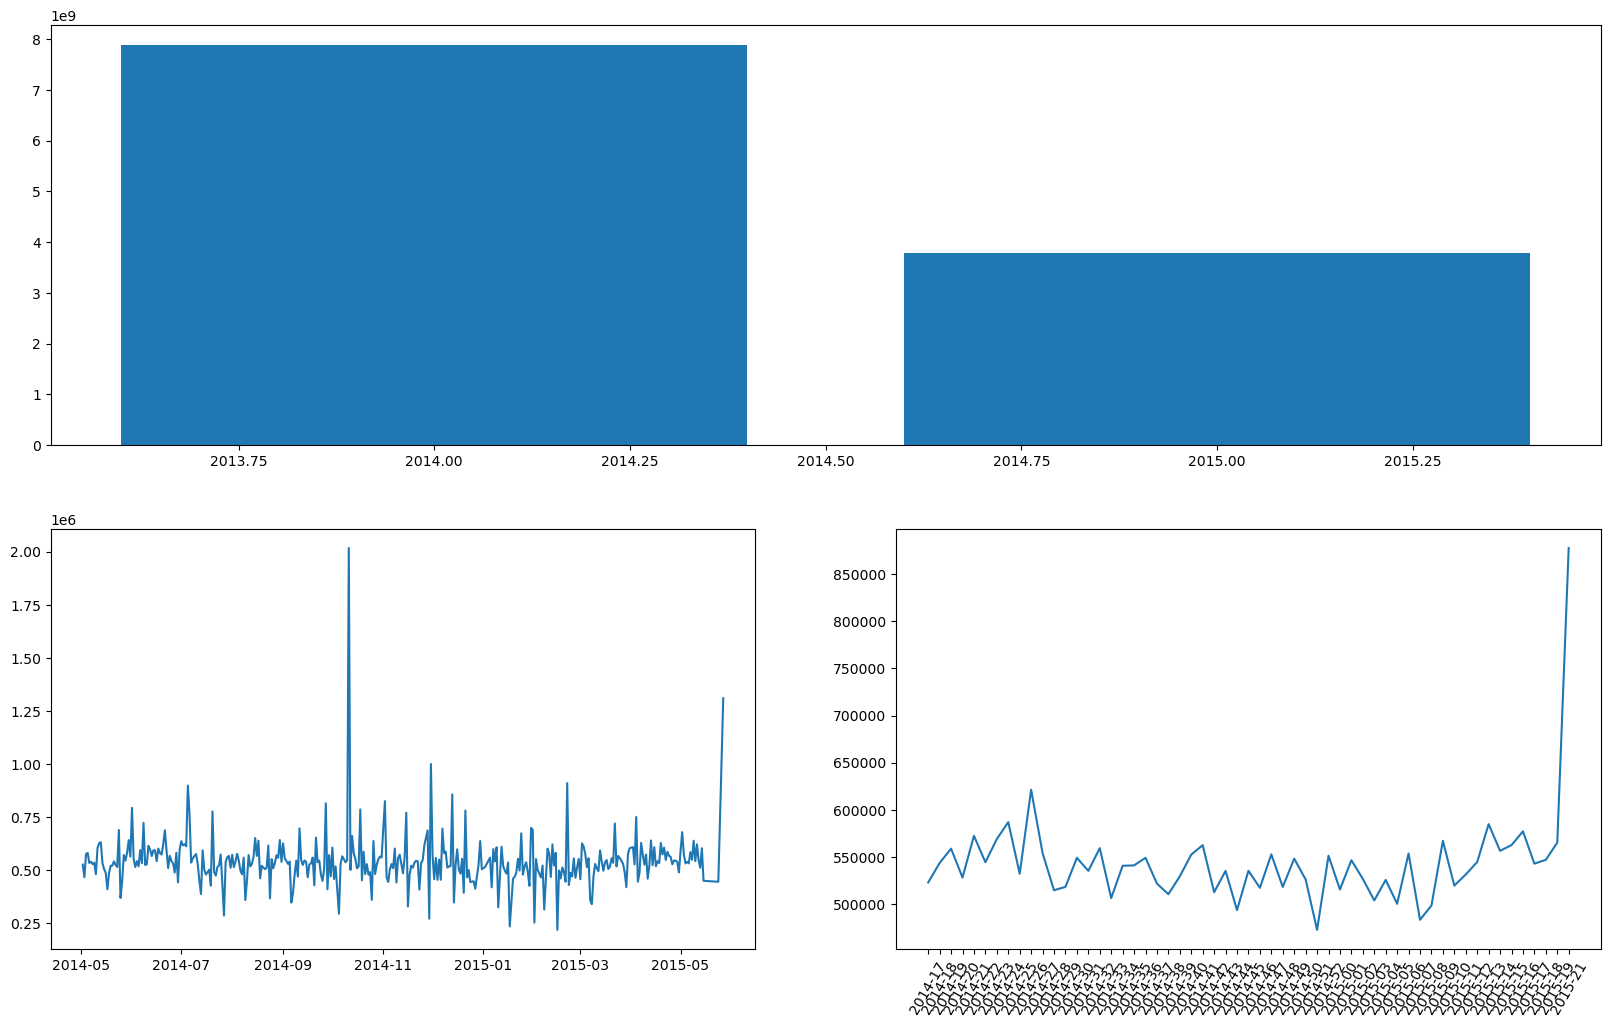

In [18]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0,:])
ax2 = fig.add_subplot(specs[1,0])
ax3 = fig.add_subplot(specs[1,1])





data['year']= pd.to_datetime(data['date']).dt.year

by_year = data[['price', 'year']].groupby('year').sum().reset_index()

ax1.bar( by_year['year'], by_year['price'])


data['day']= pd.to_datetime(data['date'])

by_day = data[['price', 'day']].groupby('day').mean().reset_index()

ax2.plot( by_day['day'], by_day['price'])



data['year_week']= pd.to_datetime(data['date']).dt.strftime('%Y-%U')

by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()

ax3.plot( by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation=60);

10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

In [19]:
import plotly.express as px

houses = data [['id','lat','long','price']]

fig = px.scatter_mapbox( houses, lat= 'lat', lon= 'long', size= 'price', color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout( height=600, margin={'r': 0, 't': 0, 'l':0, 'b':0})

ModuleNotFoundError: No module named 'plotly'

mediana = np.median(data)
media = np.mean(data)
desv_pad = np.std(data)
variancia = np.var(data)

1 Novas perguntas do CEO para vocês
1. Crie uma nova coluna chamada: “dormitory_type”
• Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
• Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
• Se o valor da coluna “bedrooms” for maior que 2 => ‘house’
2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.
3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.
4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.
5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos
imóveis, a partir do ano de 1930.
6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios
dos imóveis.
7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas
)
8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )
9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )
10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

1. Crie uma nova coluna chamada: “dormitory_type”
• Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
• Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
• Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [66]:
data['dormitory_type'] = 'NA'

for i in range( len( data ) ):
    if data.loc[i, 'bedrooms'] == 1:
        data.loc[i, 'dormitory_type'] = 'studio'
    elif data.loc[i, 'bedrooms'] == 2:
        data.loc[i, 'dormitory_type'] = 'apartment'
    elif data.loc[i, 'bedrooms'] > 2:
        data.loc[i, 'dormitory_type'] = 'house'

2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

In [ ]:
by_2 = data[['bedrooms','price' ]] .groupby('bedrooms').sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=by_2 );

3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

In [ ]:
plt.figure( figsize=(24,12))
by_3 = data[['price', 'yr_built']].groupby('yr_built').mean().reset_index()
sns.lineplot( x='yr_built', y='price', data=by_3 );

4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

  dormitory_type  price
0             NA 409504
1      apartment 401373
2          house 563092
3         studio 317643


<Axes: xlabel='price', ylabel='dormitory_type'>

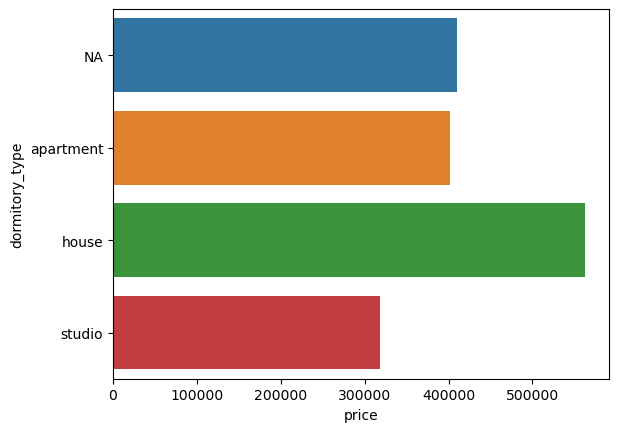

In [69]:
by_4 = data[['price', 'dormitory_type']].groupby('dormitory_type').mean().reset_index()
print(by_4)
sns.barplot( x='price', y='dormitory_type', data=by_4)

5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos
imóveis, a partir do ano de 1930.

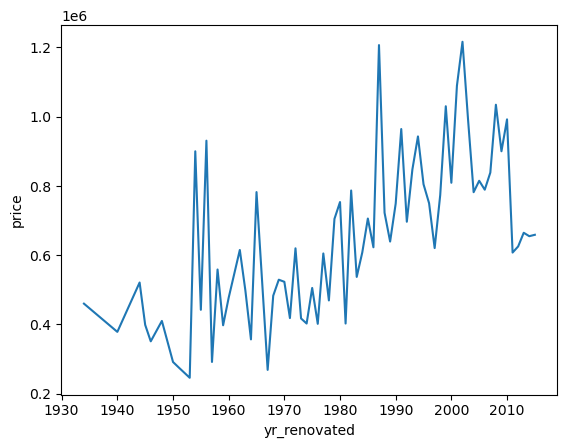

In [73]:
by_5 = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby('yr_renovated' ).mean().reset_index()
sns.lineplot( x='yr_renovated', y='price', data=by_5 );

6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios
dos imóveis.

In [67]:
print(data.head(5))

           id       date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520 2014-10-13 221900         3          1         1180      5650   
1  6414100192 2014-12-09 538000         3          2         2570      7242   
2  5631500400 2015-02-25 180000         2          1          770     10000   
3  2487200875 2014-12-09 604000         4          3         1960      5000   
4  1954400510 2015-02-18 510000         3          2         1680      8080   

   floors  waterfront  view  ...  yr_renovated  zipcode  lat  long  \
0       1           0     0  ...             0    98178   48  -122   
1       2           0     0  ...          1991    98125   48  -122   
2       1           0     0  ...             0    98028   48  -122   
3       1           0     0  ...             0    98136   48  -122   
4       1           0     0  ...             0    98074   48  -122   

   sqft_living15  sqft_lot15  year        day  year_week  dormitory_type  
0           1340        5650 

In [ ]:
print( data.dtypes)


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
dtype: object
